Step 1: Random Problem Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

customers = [
    {"id": 0, "x": 50, "y": 50},  # Depot
    {"id": 1, "x": 20, "y": 30},
    {"id": 2, "x": 60, "y": 20},
    {"id": 3, "x": 80, "y": 70},
    {"id": 4, "x": 30, "y": 90},
    {"id": 5, "x": 70, "y": 40},
]

Step 2: Distance Matrix

In [3]:
def euclidean_distance(a, b):
    return np.sqrt((a["x"] - b["x"])**2 + (a["y"] - b["y"])**2)

num_customers = len(customers)
distance_matrix = np.zeros((num_customers, num_customers))

for i in range(num_customers):
    for j in range(num_customers):
        distance_matrix[i][j] = euclidean_distance(customers[i], customers[j])

Step 3: PSO Logic

In [4]:
num_particles = 10
num_iterations = 100

# Each particle is a route (permutation of customer IDs excluding depot 0)
swarm = [random.sample(range(1, num_customers), num_customers - 1) for _ in range(num_particles)]

Step 4: Fitness Function

In [5]:
def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    current = 0  # Start at depot (0)
    for next_customer in route:
        total_distance += distance_matrix[current][next_customer]
        current = next_customer
    total_distance += distance_matrix[current][0]  # Return to depot
    return total_distance


Step 5: Find the best route

In [6]:
# === Initialize Best Scores ===
fitness_values = [calculate_total_distance(p, distance_matrix) for p in swarm]
personal_best_positions = [p.copy() for p in swarm]
personal_best_scores = fitness_values.copy()

global_best_index = np.argmin(personal_best_scores)
global_best_position = personal_best_positions[global_best_index].copy()
global_best_score = personal_best_scores[global_best_index]

In [7]:
# === Run PSO Iterations ===
for iteration in range(num_iterations):
    for i in range(num_particles):
        # Mutation: swap two cities in route
        new_particle = personal_best_positions[i].copy()
        a, b = random.sample(range(len(new_particle)), 2)
        new_particle[a], new_particle[b] = new_particle[b], new_particle[a]

        new_fitness = calculate_total_distance(new_particle, distance_matrix)

        if new_fitness < personal_best_scores[i]:
            personal_best_scores[i] = new_fitness
            personal_best_positions[i] = new_particle.copy()

    # Update global best
    best_index = np.argmin(personal_best_scores)
    if personal_best_scores[best_index] < global_best_score:
        global_best_score = personal_best_scores[best_index]
        global_best_position = personal_best_positions[best_index].copy()

    print(f"Iteration {iteration+1}: Best Distance = {global_best_score:.2f}")

Iteration 1: Best Distance = 236.69
Iteration 2: Best Distance = 236.69
Iteration 3: Best Distance = 236.69
Iteration 4: Best Distance = 236.69
Iteration 5: Best Distance = 236.69
Iteration 6: Best Distance = 236.69
Iteration 7: Best Distance = 236.69
Iteration 8: Best Distance = 236.34
Iteration 9: Best Distance = 236.34
Iteration 10: Best Distance = 236.34
Iteration 11: Best Distance = 229.84
Iteration 12: Best Distance = 229.84
Iteration 13: Best Distance = 229.84
Iteration 14: Best Distance = 229.84
Iteration 15: Best Distance = 229.84
Iteration 16: Best Distance = 229.84
Iteration 17: Best Distance = 229.84
Iteration 18: Best Distance = 229.84
Iteration 19: Best Distance = 229.84
Iteration 20: Best Distance = 229.84
Iteration 21: Best Distance = 229.84
Iteration 22: Best Distance = 229.84
Iteration 23: Best Distance = 229.84
Iteration 24: Best Distance = 229.84
Iteration 25: Best Distance = 229.84
Iteration 26: Best Distance = 229.84
Iteration 27: Best Distance = 229.84
Iteration 

Step 6: Final Result

In [8]:
print("\nBest Route Found (excluding depot):", global_best_position)
print("Total Distance:", global_best_score)


Best Route Found (excluding depot): [4, 3, 5, 2, 1]
Total Distance: 229.843033008839


Step 7: Plotting the Best Route

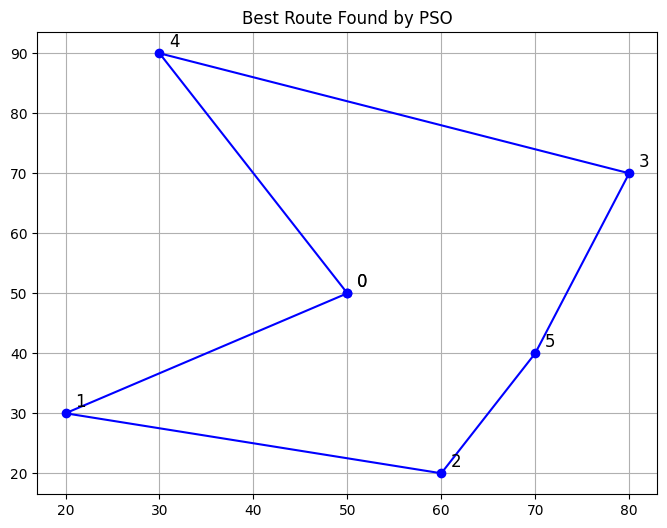

In [9]:
best_route = [0] + global_best_position + [0]
x = [customers[i]['x'] for i in best_route]
y = [customers[i]['y'] for i in best_route]

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o', linestyle='-', color='blue')
for i, cid in enumerate(best_route):
    plt.text(customers[cid]['x']+1, customers[cid]['y']+1, str(cid), fontsize=12)
plt.title("Best Route Found by PSO")
plt.grid(True)
plt.show()